--- 
title: PA 8.2
author: Isabelle Antaran
format:
    html:
        toc: true
        code-fold: true
        embed-resources: true
theme: flatly
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [21]:
import pandas as pd
import numpy as np

from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import plotnine as p9

In [22]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [23]:
penguins_clean = penguins.dropna()

In [24]:
X = penguins_clean.drop('species', axis=1)
y = penguins_clean['species']
     

In [25]:
# Dummify categorical variables (island and sex)
# drop_first=True to avoid multicollinearity
X_dummified = pd.get_dummies(X, columns=['island', 'sex'], drop_first=True)

print("Columns after dummification:")
print(X_dummified.columns.tolist())
print(f"Shape: {X_dummified.shape}")

Columns after dummification:
['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year', 'island_Dream', 'island_Torgersen', 'sex_male']
Shape: (333, 8)


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dummified, y, test_size=0.25, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nClass distribution in training set:\n{y_train.value_counts()}")
print(f"\nClass distribution in test set:\n{y_test.value_counts()}")

models = {
    "kNN (K=3)": KNeighborsClassifier(n_neighbors=3),
    "kNN (K=10)": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree (alpha = 0.5)": DecisionTreeClassifier(ccp_alpha = 0.5),
    "Decision Tree (alpha = 2)": DecisionTreeClassifier(ccp_alpha = 2)
}

model_results = {}

Training set size: 249
Test set size: 84

Class distribution in training set:
species
Adelie       109
Gentoo        89
Chinstrap     51
Name: count, dtype: int64

Class distribution in test set:
species
Adelie       37
Gentoo       30
Chinstrap    17
Name: count, dtype: int64


In [30]:
for name, model in models.items():
    print(f" Evaluating Model: {name}")
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    
    #  Evaluation Metrics 
    # A) Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print("Confusion Matrix:")
    print(cm)

    # B) Classification Report 
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    
    # C) AUC Score 
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"Multi-class AUC (One-vs-Rest): {auc:.4f}\n")
    
    # Store probabilities for ROC 
    model_results[name] = {
        'model': model,
        'y_pred_proba': y_pred_proba
    }

 Evaluating Model: kNN (K=3)
Confusion Matrix:
[[36  1  0]
 [ 1 16  0]
 [ 0  0 30]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        37
   Chinstrap       0.94      0.94      0.94        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84

Multi-class AUC (One-vs-Rest): 0.9995

 Evaluating Model: kNN (K=10)
Confusion Matrix:
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      

C:\Users\antar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\antar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\antar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\antar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\ant

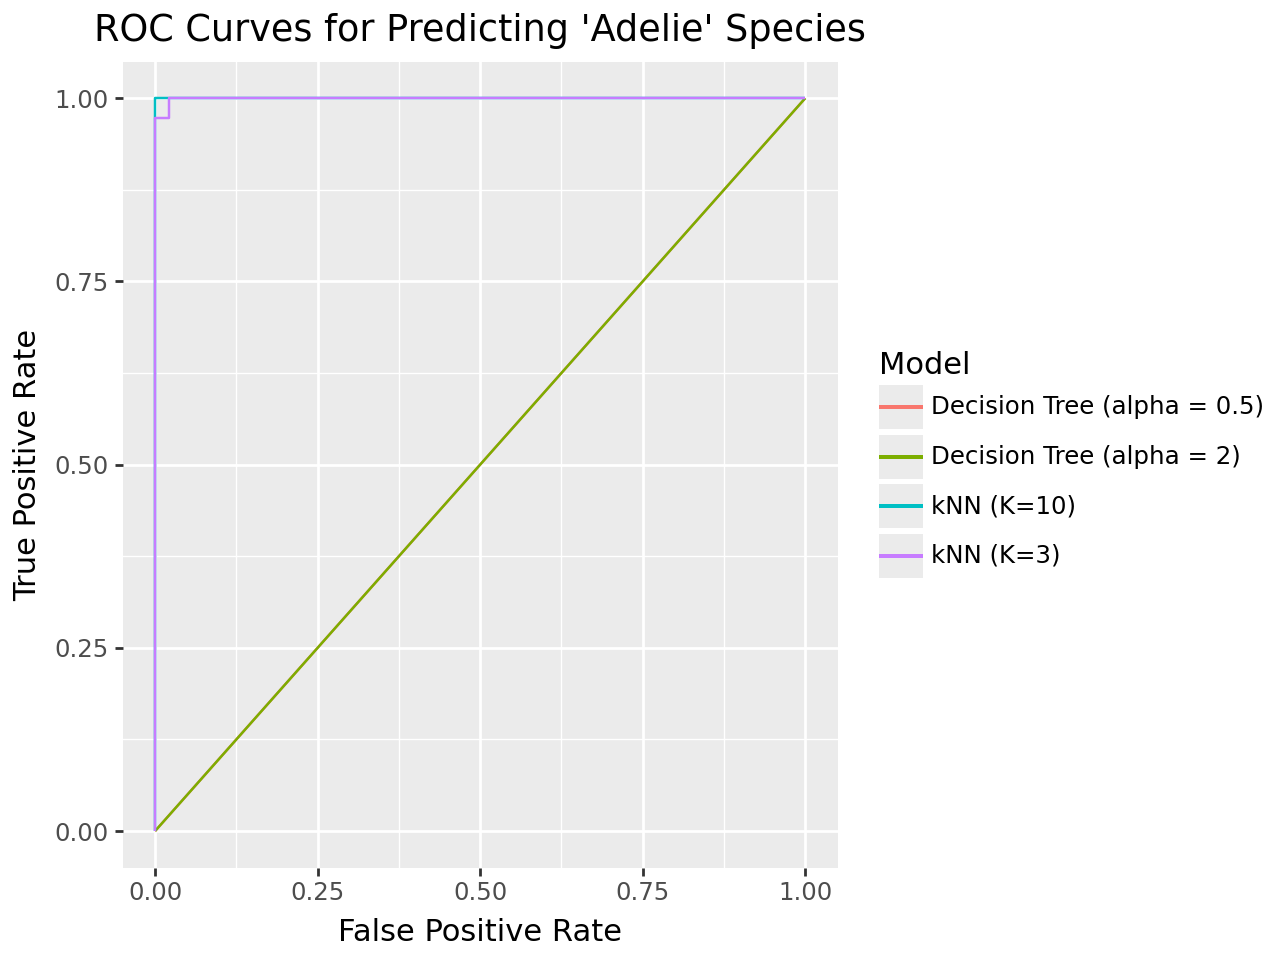

In [ ]:
positive_class = 'Adelie'

roc_rows = []
for name, results in model_results.items():
    model_classes = list(results['model'].classes_)
    if positive_class not in model_classes:
        continue
    pos_idx = model_classes.index(positive_class)

    y_true_bin = (y_test == positive_class).astype(int).values
    y_score = results['y_pred_proba'][:, pos_idx]

    fpr, tpr, _ = roc_curve(y_true_bin, y_score)

    roc_rows += [
        {"fpr": f, "tpr": t, "model": name}
        for f, t in zip(fpr, tpr)
    ]

roc_df = pd.DataFrame(roc_rows)

# Plot with plotnine (ggplot-style) 
plot = (
    p9.ggplot(roc_df, p9.aes(x="fpr", y="tpr", color="model"))
    + p9.geom_line()
    + p9.labs(
        title=f"ROC Curves for Predicting '{positive_class}' Species",
        x="False Positive Rate",
        y="True Positive Rate",
        color="Model"
    )
    + p9.theme(legend_position="right")
)

plot.show()